In [ ]:
! pip install num2words
! pip install emoji

In [ ]:
import json
import numpy
import string
from num2words import num2words
import re
import emoji
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
% cd gdrive/MyDrive/Laborator - NLP/Proiect

Mounted at /content/gdrive
/content/gdrive/MyDrive/Laborator - NLP/Proiect


Folosim doua variante pentru clase:
  - clasele sunt de la 1 la 5 
  - clasele sunt de la 1 la 3 (grupam clasele 1 si 2, respectiv 4 si 5

In [ ]:
# citim review-urile
with open("amazon_one_plus_reviews.json", "r") as f:
    all_reviews = json.load(f) 

reviews = []
labels = []
labels_group = []
texts_without_duplicate = []
for review in all_reviews:
  if review["product"] == 'OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)':
    text = review['review_title'] + " " + review['review_text']
    if text in texts_without_duplicate:
       continue
    reviews.append(text)
    texts_without_duplicate.append(text)
    stars = int(float(review['review_rating'][0:3]))
    # clasele separate
    labels.append(stars)
    # clasele grupate
    if stars < 3: labels_group.append(1) # bad si very bad
    elif stars > 3: labels_group.append(3) # good si very good
    else: labels_group.append(2) # neutral

In [ ]:
print(len(reviews))
print(len(labels))

9067
9067


In [ ]:
emoji_re = emoji.get_emoji_regexp()
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  """Entry point for launching an IPython kernel.


In [ ]:
# preprocesam datele

def preprocessing_function(review):
  review_without_endl_and_lower = review.replace("\n", " ").lower() # eliminam endline-urile din review-uri si le transformarea in litere mici
  review_without_punctuation = re.sub(r"[^\w\s]", ' ', review_without_endl_and_lower) # eliminam punctuatia
  review_without_emoji = re.sub(emoji_re,' ', review_without_punctuation) # eliminam emoji-urile
  review_without_spaces = re.sub(r'\s+', ' ', review_without_emoji).strip() # eliminam spatiile multiple
  review_num2words = (' '.join([num2words(word) if word.isdigit() else word for word in review_without_spaces.split()]))  # transformam numerele in litere
  return review_num2words

preprocessed_reviews = [preprocessing_function(review) for review in reviews]
print(reviews[0])
print(preprocessed_reviews[0])
reviews = preprocessed_reviews

*Read before you buy!!* 
  Yea..pre-ordered on 28 July, got it on 4 August. Package was nice without any damage. So here is my first impression:
read before you buy yea pre ordered on twenty-eight july got it on four august package was nice without any damage so here is my first impression


In [ ]:
# impartim datele in date de antrenare, validare si testare
train_data, test_validation_data = train_test_split(reviews, test_size=0.20, random_state = 42)
validation_data, test_data = train_test_split(test_validation_data, test_size=0.50, random_state = 42)

train_labels, test_validation_labels = train_test_split(labels, test_size=0.20, random_state = 42)
validation_labels, test_labels = train_test_split(test_validation_labels, test_size=0.50, random_state = 42)

train_labels_group, test_validation_labels_group = train_test_split(labels_group, test_size=0.20, random_state = 42)
validation_labels_group, test_labels_group = train_test_split(test_validation_labels_group, test_size=0.50, random_state = 42)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
validation_labels = np.array(validation_labels)
train_labels_group = np.array(train_labels_group)
test_labels_group = np.array(test_labels_group)
validation_labels_group = np.array(validation_labels_group)

print(len(train_labels))
print(len(train_labels_group))

7253
7253


In [ ]:
# atribuim cuvintelor din review un index

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_data)
train_data_tokenize = tokenizer.texts_to_sequences(train_data)
validation_data_tokenize = tokenizer.texts_to_sequences(validation_data)
test_data_tokenize = tokenizer.texts_to_sequences(test_data)
vocab_size = len(tokenizer.word_index) + 1 
print(vocab_size)
print(train_data[0])
print(train_data_tokenize[0]) 

6105
one plus nord 12gb i have some issue about video playing it automatically stops for little bit of second
[16, 28, 21, 288, 7, 40, 112, 37, 114, 244, 417, 6, 248, 11, 186, 206, 19, 536]


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# aducem toate reprezentarile la aceasi dimensiune maxima
maxlen = 300
train_data_tokenize = np.array(pad_sequences(train_data_tokenize, padding='post', maxlen=maxlen))
validation_data_tokenize = np.array(pad_sequences(validation_data_tokenize, padding='post', maxlen=maxlen))
test_data_tokenize = np.array(pad_sequences(test_data_tokenize, padding='post', maxlen=maxlen))
print(test_data_tokenize[0, :]) 

[29 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
from keras.models import Sequential
from keras import layers 
from keras.callbacks import EarlyStopping

from numpy.random import seed
from tensorflow import random
seed(1)
random.set_seed(2)

# definim modelul 
embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))

model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D())

model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D())

model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2)

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          610500    
                                                                 
 conv1d_2 (Conv1D)           (None, 298, 64)           19264     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 149, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 145, 64)           20544     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 72, 64)           0         
 1D)                                                             
                                                                 
 global_average_pooling1d_1   (None, 64)              

Antrenam modelul mai intai pe varianta cu 5 clase: very good - 5, good - 4, neutral -3, bad - 2 si very bad - 1

In [ ]:
# antrenam modelul
model.fit(
    x=train_data_tokenize,
    y=train_labels,
    batch_size=64,
    epochs=50,
    validation_data=(validation_data_tokenize, validation_labels),
    verbose=1,
    callbacks=early_stop
)

Epoch 1/50
114/114 [==============================] - 14s 112ms/step - loss: 1.4277 - accuracy: 0.4954 - val_loss: 1.2940 - val_accuracy: 0.5116
Epoch 2/50
114/114 [==============================] - 12s 109ms/step - loss: 1.1906 - accuracy: 0.5228 - val_loss: 1.1200 - val_accuracy: 0.5733
Epoch 3/50
114/114 [==============================] - 12s 109ms/step - loss: 1.0176 - accuracy: 0.5882 - val_loss: 0.9994 - val_accuracy: 0.6097
Epoch 4/50
114/114 [==============================] - 12s 109ms/step - loss: 0.9472 - accuracy: 0.6119 - val_loss: 0.9658 - val_accuracy: 0.6152
Epoch 5/50
114/114 [==============================] - 13s 112ms/step - loss: 0.9145 - accuracy: 0.6206 - val_loss: 0.9478 - val_accuracy: 0.6251
Epoch 6/50
114/114 [==============================] - 12s 109ms/step - loss: 0.8941 - accuracy: 0.6302 - val_loss: 0.9400 - val_accuracy: 0.6163
Epoch 7/50
114/114 [==============================] - 12s 109ms/step - loss: 0.8769 - accuracy: 0.6378 - val_loss: 0.9380 - val_ac

In [ ]:
test_pred = np.argmax(model.predict(test_data_tokenize), axis=-1)

In [ ]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(test_labels, test_pred)
accuracy

0.5997794928335171

In [ ]:
print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           1       0.58      0.65      0.61       130
           2       0.00      0.00      0.00        53
           3       0.21      0.36      0.27        69
           4       0.40      0.24      0.30       208
           5       0.74      0.86      0.80       447

    accuracy                           0.60       907
   macro avg       0.39      0.42      0.39       907
weighted avg       0.56      0.60      0.57       907

[[ 85   0  28  10   7]
 [ 26   0  15   8   4]
 [ 17   0  25  13  14]
 [ 15   0  34  49 110]
 [  4   0  16  42 385]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


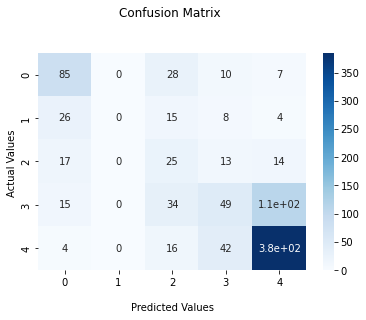

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

ax = sns.heatmap(metrics.confusion_matrix(test_labels, test_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

Antrenam modelul pe varianta cu 3 clase: good - 5 si 4, neutral -3, bad - 2 si 1 

In [ ]:
# antrenam modelul
model.fit(
    x=train_data_tokenize,
    y=train_labels_group,
    batch_size=64,
    epochs=50,
    validation_data=(validation_data_tokenize, validation_labels_group),
    verbose=1,
    callbacks=early_stop
)

Epoch 1/50
114/114 [==============================] - 13s 113ms/step - loss: 0.8998 - accuracy: 0.7072 - val_loss: 0.7465 - val_accuracy: 0.7266
Epoch 2/50
114/114 [==============================] - 12s 109ms/step - loss: 0.6599 - accuracy: 0.7502 - val_loss: 0.5893 - val_accuracy: 0.7795
Epoch 3/50
114/114 [==============================] - 12s 109ms/step - loss: 0.5179 - accuracy: 0.8042 - val_loss: 0.5268 - val_accuracy: 0.8214
Epoch 4/50
114/114 [==============================] - 12s 109ms/step - loss: 0.4583 - accuracy: 0.8237 - val_loss: 0.4966 - val_accuracy: 0.8225
Epoch 5/50
114/114 [==============================] - 12s 109ms/step - loss: 0.4277 - accuracy: 0.8294 - val_loss: 0.4733 - val_accuracy: 0.8335
Epoch 6/50
114/114 [==============================] - 13s 110ms/step - loss: 0.4116 - accuracy: 0.8384 - val_loss: 0.4856 - val_accuracy: 0.8346
Epoch 7/50
114/114 [==============================] - 12s 109ms/step - loss: 0.4003 - accuracy: 0.8405 - val_loss: 0.4740 - val_ac

In [ ]:
test_pred_group = np.argmax(model.predict(test_data_tokenize), axis=-1)

In [ ]:
accuracy_group = metrics.accuracy_score(test_labels_group, test_pred_group)
accuracy_group

0.8357221609702316

In [ ]:
print(metrics.classification_report(test_labels_group, test_pred_group))
print(metrics.confusion_matrix(test_labels_group, test_pred_group))

              precision    recall  f1-score   support

           1       0.68      0.77      0.72       183
           2       0.17      0.01      0.03        69
           3       0.89      0.94      0.91       655

    accuracy                           0.84       907
   macro avg       0.58      0.57      0.55       907
weighted avg       0.79      0.84      0.81       907

[[140   3  40]
 [ 30   1  38]
 [ 36   2 617]]


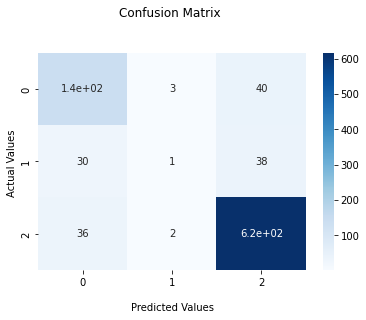

In [ ]:
ax = sns.heatmap(metrics.confusion_matrix(test_labels_group, test_pred_group), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()